In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
dat=pd.read_csv('Car_sales.csv')
dat.rename({'__year_resale_value':'resale_value'},axis=1,inplace=True)
dat.interpolate(method='linear',inplace=True)
dat.drop('Latest_Launch',axis=1,inplace=True)

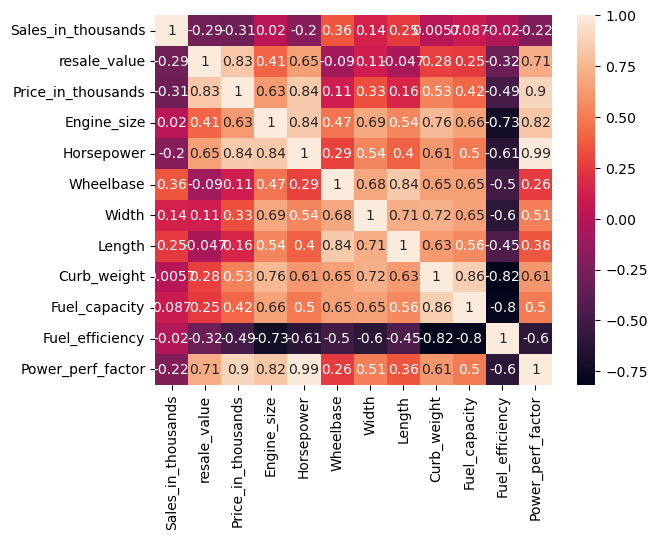

In [65]:
dat.describe()
sns.heatmap(dat.select_dtypes('number').corr(),annot=True)
plt.show()

In [5]:
import sklearn
from sklearn import linear_model,preprocessing


In [6]:
proc=preprocessing.LabelEncoder()
dat['Manufacturer']=proc.fit_transform(list(dat['Manufacturer']))
dat['Vehicle_type']=proc.fit_transform(list(dat['Vehicle_type']))
dat['Model']=proc.fit_transform(list(dat['Model']))

In [37]:
x=np.array(dat.drop('Price_in_thousands',axis=1))
y=np.array(dat['Price_in_thousands'])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.1)

In [47]:
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)

acc=lm.score(x_test,y_test)
acc

0.9997907947861431